<h1 align="center"><b>Homework Assignment 2 (100 points total)</b></h1>
<h3 align="center"><b>Assigned at the start of Module 3</b></h3>
<h3 align="center"><b>Due at the end of Module 5</b></h3><br>


# Q1: Outlier Detection with Mahalanobis Distance

## Developing multi-variate methods for outlier detection (40 points total)

The **Mahalanobis distance** provides a statistical measure of the distance between a point and a distribution. When applied to multivariate data, **ellipses** can help visualize outliers by showing confidence regions for different standard deviations.

You have been given a dataset (**Iris dataset**) with three species of flowers: **Setosa, Versicolor, and Virginica**. Each species has measurements for:
- **Sepal Length**
- **Sepal Width**
- **Petal Length**
- **Petal Width**

---

## **Tasks**

### **1. Conceptual Understanding (10 points)**
**Q1.**  Explain why **Mahalanobis distance-based ellipses** are useful for outlier detection.

**Ans.** Euclidean based straight-line distance doesn’t care about direction or scale of data. On the other hand, Mahalanobis does consider scales the distance based on variance and correlation in the data. Mahalanobis distance measures how many standard deviations away a point is from the mean, considering the shape of the data (covariance). If a point has a high Mahalanobis distance (equidistance lines are ellipses), it’s likely an outlier — because it’s far from the bulk of the data considering the data’s spread and shape.

**Q2.**  Compare this method with **standard deviation-based outlier detection** in one-dimensional data.

**Ans.** **Standard Deviation Method (1D) also called Z-score** for a normal distribution is measured as below
$$
\begin{align*}
Z(x) = \frac{x-\mu}{\sigma}
\end{align*}
$$

It generally follow following distributions
- 68% → ±1σ,
- 95% → ±2σ,
- 99.7% → ±3σ

Commonly, data points with a Z-score greater than 3 or less than -3 are considered outliers

Let's define **Mahalanobis Distance in 1D**. Following is standard Mahalanobis formula
$$
\begin{align*}
MD² = (x - μ)ᵀ * Σ⁻¹ * (x - μ)
\end{align*}
$$

Where:

- x: the data point
- μ: the mean of the dataset
- Σ: the covariance matrix
- Σ⁻¹: inverse of the covariance matrix

In One Dimension (1D) we will have following
1. The data point x is just a single number.
2. The mean μ is just a single number.
3. The transpose (x - μ)ᵀ is meaningless for a single number; it's just (x - μ).
4. The covariance matrix Σ becomes the variance, which is simply σ².
5. The inverse of the covariance matrix Σ⁻¹ becomes the inverse of the variance: 1 / σ².

Plugging it back into the formula:

MD² = (x - μ) * (1 / σ²) * (x - μ)

MD² = (x - μ)² / σ²

MD² = [ (x - μ) / σ ]²


It eventually became same as Standard Deviation in 1D (Z-score)
$$
\begin{align*}
MD = \frac{|x-\mu|}{\sigma}
\end{align*}
$$

**Therefore, in one dimension: Mahalanobis Distance = |Z-score| (The absolute value of the Z-score)**

---

### **2. Implementation (10 points)**
**Q1.** Use the provided code to **generate ellipses** for all three species using the features **sepal_length** and **petal_width**.

Ans. Updated code for features **sepal_length** and **petal_width**  Generated the graph. Please refer below.

**Q2.** Modify the class **`sigma_ellipse_plot`** to allow for the selection of **custom standard deviation thresholds** (e.g., `[1.5, 2.5, 3.5]` instead of `[1, 2, 3]`).

Ans. Updated the code to pass **std_dev** with custom value. Please refer below.

---

### **3. Analysis and Interpretation (10 points)**
**Q1.**. Based on your plot, **identify a point that falls outside the 3-standard deviation ellipse**. Is it an outlier? **Justify your answer.**

Ans. Let's first understand the **meaning of ellipses**. The ellipses in the plot represent confidence boundaries based on Mahalanobis distance. Each ellipse is a contour of equal Mahalanobis distance from the cluster's center (μ). The code was configured to draw ellipses corresponding to specific statistical distances (1.5, 2.5, and 3.5 standard deviations). The outermost ellipse represents the largest boundary (e.g., 3.5 standard deviations).

Inspecting visually, we can see following outliars

- **Setosa**: Has one definite outlier at **sepal_length ≈ 5, petal_width ≈ 0.6.5**. This point is a Setosa flower that is clustered visually with the Setosa group and lies well outside of the blue ellipses.
- **Versicolor**: Has no apparent outliers. The Versicolor cluster seems very tight and well-defined.
- **Virginica**:Has no apparent outliers. The Virginica cluster seems very tight and well-defined.


**Q2.**  What would happen if the **covariance** between the selected features was **higher**? How would the **ellipse change**?

Ans. If the covariance between the selected features (sepal_length and petal_width) were higher, the ellipses would become narrower and more elongated along the main diagonal axis. Following are more details

- Covariance measures how two variables change together.
- High Positive Covariance means there is a strong positive correlation: when one variable increases, the other variable also tends to increase in a very predictable, linear fashion. For example, a person's height and shoe size have high positive covariance.
- The shape and orientation of the error ellipses are determined by the eigenvectors and eigenvalues of the covariance matrix.
- With higher covariance, the data points themselves would cluster more tightly around a steeply sloped line.
- The largest eigenvalue, which corresponds to the variance along the main axis of correlation (the length of the ellipse), would increase. The data is more spread out along this primary direction.
- Therefore the ellipse's major axis (its length) is proportional to the square root of the largest eigenvalue. This axis would get longer.
- On the otherhand, the ellipse's minor axis (its width) is proportional to the square root of the smallest eigenvalue. This axis would get shorter.

---

### **4. Beyond Visual Identification (10 points)**
**Q.**  The error ellipses provide a visual representation of outliers, but in many real-world applications, visualization may not be feasible for high-dimensional data. How can this method be used to identify outliers numerically without relying on visualization?

Ans. We can take following Numerical approach

1. Calculate the Mahalanobis distance for every single point.
2. Compare that distance to a calculated statistical threshold.
3. Any point whose distance exceeds the threshold is flagged as an outlier.

**Statistical Threshold using Chi-Squared (χ²):**There is a fundamental statistical theorem that states: for data that follows a multivariate normal distribution, the squared Mahalanobis distances of the points follow a Chi-squared (χ²) distribution.

Please refer the python code added to identify Numerical approach for Ouliar detection.




## Example Code

In [107]:
import warnings
warnings.filterwarnings("ignore")

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh
import math
from scipy.stats.distributions import chi2
from scipy.stats import norm
from scipy import stats
import seaborn as sns
from sklearn import datasets
#%matplotlib inline

class sigma_ellipse_plot:

    def __init__(self, df=None, target='setosa', target_header='species', feature1='sepal_length', feature2='petal_width', std_devs=[1, 2, 3]):

        self.data = df
        self.target = target
        self.feature1 = feature1
        self.feature2 = feature2
        self.target_header = target_header
        self.std_devs=std_devs
        self.largest_eigenvalue = None
        self.largest_eigenvector = None
        self.smallest_eigenvalue = None
        self.smallest_eigenvector = None
        self.angle = None
        self.mean = None
        self.r_ellipses = None
        self.mu_X = None
        self.mu_Y = None
        self.chisquare_val = None

    def get_data(self):

        self.data = self.data[self.data[self.target_header] == self.target].drop(self.target_header, axis =1)[[self.feature1, self.feature2]]

        return

    def get_eigens(self):

        covariance_matrix = self.data.cov()
        eigenvalues, eigenvectors = eigh(covariance_matrix)

        self.largest_eigenvector = eigenvectors[np.argmax(eigenvalues)]
        self.largest_eigenvalue = np.max(eigenvalues)
        self.smallest_eigenvector = eigenvectors[np.argmin(eigenvalues)]
        self.smallest_eigenvalue = np.min(eigenvalues)

        return

    def get_angle(self):

        self.angle = math.atan2(self.largest_eigenvector[1], self.largest_eigenvector[0])

        return

    def shift_angle(self):

        if self.angle < 0:
            self.angle = self.angle + 2*math.pi

        return

    def get_mean(self):

        self.mean = self.data.mean()

        return

    def get_chisquare_vals(self):

        self.chisquare_val = []
        for i in range(0, len(self.std_devs)):
            percent_covered = stats.norm.cdf(self.std_devs[i]) - stats.norm.cdf(self.std_devs[i] * -1)
            self.chisquare_val.append((chi2.ppf(percent_covered, df=2))**0.5)

        return self.chisquare_val

    def get_ellipses(self):

        chisquare_val = self.get_chisquare_vals()

        self.r_ellipses = []
        for i in range(0, len(self.std_devs)):
            theta_grid = np.linspace(0,2*math.pi, 100)
            phi = self.angle
            self.mu_X = self.mean[0]
            self.mu_Y = self.mean[1]
            a = chisquare_val[i] * math.sqrt(self.largest_eigenvalue)
            b = chisquare_val[i] * math.sqrt(self.smallest_eigenvalue)

            ellipse_x_r = a * np.cos(theta_grid)
            ellipse_y_r = b * np.sin(theta_grid)

            R = [[math.cos(phi), math.sin(phi)], [-math.sin(phi), math.cos(phi)]]

            ellipses = np.array([ellipse_x_r, ellipse_y_r])

            r_ellipse = ellipses.T.dot(R).T

            self.r_ellipses.append(r_ellipse)

        return

    def get_labels(self, special_phrase=None):

        labels = []
        for i in range(0, len(self.std_devs)):

            if special_phrase is None:
                label = str(self.std_devs[i]) + " std. dev. from mean"
                labels.append(label)
            else:
                label = special_phrase + str(self.std_devs[i]) + " std. dev. from mean"
                labels.append(label)

        return labels

    def pipeline(self):

        self.get_data()
        self.get_eigens()
        self.get_angle()
        self.shift_angle()
        self.get_mean()
        self.get_ellipses()

        return self.data, self.r_ellipses, self.mu_X, self.mu_Y


In [109]:
## Import Dataset ##

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = (
    df.columns.str.replace(' ', '_')
    .str.replace(r'\(cm\)', '', regex=True)
    .str.lower()
    .str.rstrip('_'))
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.head())

## Feature Definition ##

feature1 = 'sepal_length' # Updated as per given task
feature2 = 'petal_width'
custom_std_devs = [1.5, 2.5, 3.5]

## Species Specific Ellipse Generation ##

setosa_ellipses_obj = sigma_ellipse_plot(df=df, target='setosa', feature1=feature1, feature2=feature2, std_devs=custom_std_devs) # Use custom std_devs
setosa_df, setosa_ellipses, setosa_mu_X, setosa_mu_Y = setosa_ellipses_obj.pipeline()
setosa_plot_labels = setosa_ellipses_obj.get_labels()

versicolor_ellipses_obj = sigma_ellipse_plot(df=df, target='versicolor', feature1=feature1, feature2=feature2, std_devs=custom_std_devs) # Use custom std_devs
versicolor_df, versicolor_ellipses, versicolor_mu_X, versicolor_mu_Y = versicolor_ellipses_obj.pipeline()
versicolor_plot_labels = versicolor_ellipses_obj.get_labels()

virginica_ellipses_obj = sigma_ellipse_plot(df=df, target='virginica', feature1=feature1, feature2=feature2, std_devs=custom_std_devs) # Use custom std_devs
virginica_df, virginica_ellipses, virginica_mu_X, virginica_mu_Y = virginica_ellipses_obj.pipeline()
virginica_plot_labels = virginica_ellipses_obj.get_labels()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


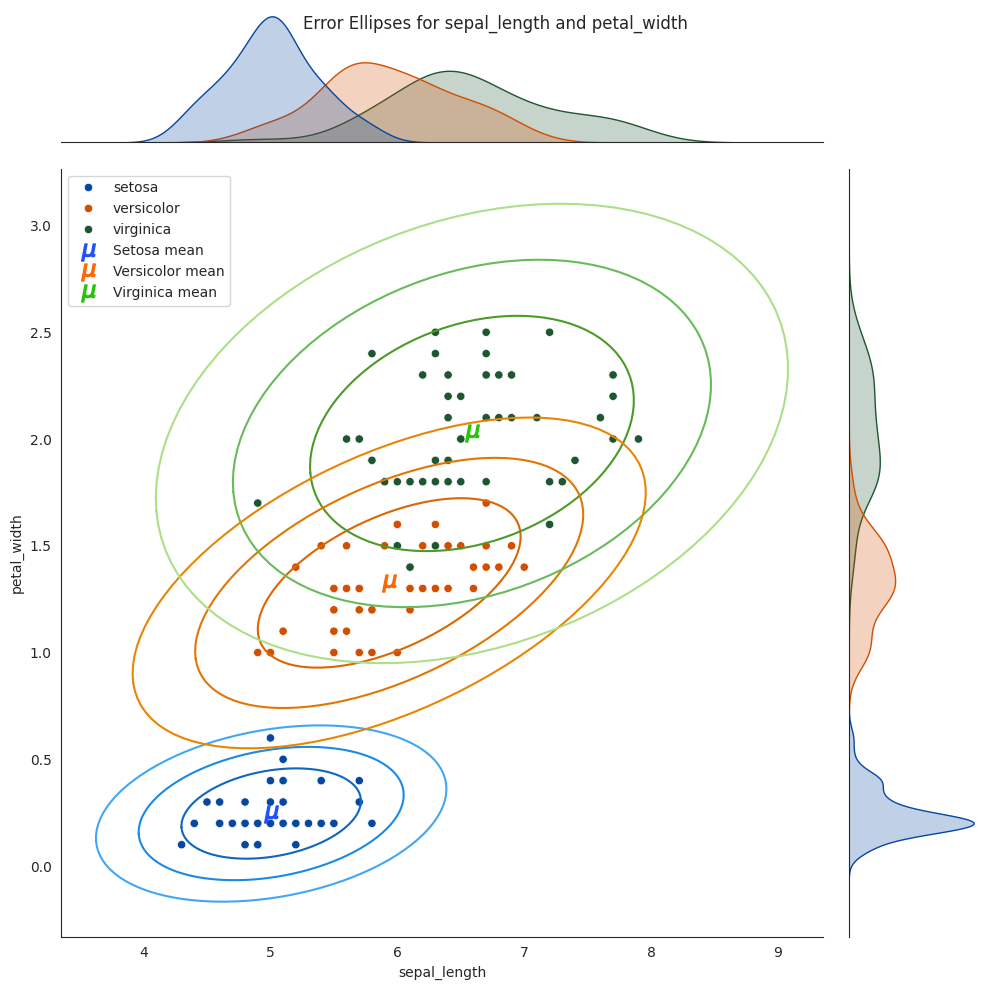

In [110]:
## Visualization of Ellipse Plots ##

sns.set_style("white")

df_subset = df[[feature1, feature2, 'species']]

# palette order - setosa, virginica, versicolor
petal_width_plot = sns.jointplot(data=df_subset, x=feature1, y=feature2, hue="species", palette = ["#0747a1", '#d24e01','#1e5631' ], height = 10)
colors_for_plot_setosa = ['#1065c0', '#1a8ae5', '#41a7f5']
colors_for_plot_virginica = ['#4c9a2a', '#68bb59', '#acdf87']
colors_for_plot_versicolor = ['#dc6601', '#e27602', '#e88504']

# Dynamic title for chart
plt.suptitle(f"Error Ellipses for {feature1} and {feature2}" )

plt.scatter(setosa_mu_X, setosa_mu_Y, c='#1F51FF', s=150, label = 'Setosa mean', marker='$\mu$')
plt.scatter(versicolor_mu_X, versicolor_mu_Y, c='#FF6700', s=150, label = 'Versicolor mean', marker='$\mu$')
plt.scatter(virginica_mu_X, virginica_mu_Y, c='#2Bc20e', s=150, label = 'Virginica mean', marker='$\mu$')

plt.legend()

# Plots the ellipses for each species, with the appropriate colors
for i in range(0, len(setosa_ellipses)):
    plt.plot(setosa_ellipses[i][0] + setosa_mu_X, setosa_ellipses[i][1] + setosa_mu_Y, colors_for_plot_setosa[i], label= setosa_plot_labels[i])
    plt.plot(versicolor_ellipses[i][0] + versicolor_mu_X, versicolor_ellipses[i][1] + versicolor_mu_Y, colors_for_plot_versicolor[i], label= versicolor_plot_labels[i])
    plt.plot(virginica_ellipses[i][0] + virginica_mu_X, virginica_ellipses[i][1] + virginica_mu_Y, colors_for_plot_virginica[i], label= virginica_plot_labels[i])

# Save the plot as an image
plt.savefig('MahalanobisOultlierExample.svg')

# Show the plot (optional)
plt.show()

In [111]:
# Numerical approach to find outliars
# --- Define the two features to use ---
feature1 = 'sepal_length'
feature2 = 'petal_width'
features_to_use = [feature1, feature2]

# --- Numerical Outlier Detection for 2 Features ---
significance_level = 0.01  # Flag points outside the 99% confidence ellipse

# Get Degrees of Freedom (number of features)
d = len(features_to_use) # d = 2

# Calculate the Chi-Squared threshold
chi_squared_threshold = chi2.ppf(1 - significance_level, df=d)

print(f"Features being analyzed: {features_to_use}")
print(f"Number of dimensions: {d}")
print(f"Significance Level: {significance_level} (Corresponds to a {100*(1-significance_level)}% confidence boundary)")
print(f"Chi-Squared Threshold for MD²: {chi_squared_threshold:.4f}\n")

# Iterate through each species to find outliers within that group
for species in df['species'].unique():
    print(f"--- Analyzing species: {species} ---")

    # Isolate the data for the current species and selected features
    group_data = df[df['species'] == species][features_to_use]

    # Calculate the mean and inverse covariance matrix for the group
    mean_vector = group_data.mean().values
    cov_matrix = group_data.cov().values
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    outlier_count = 0
    # Calculate Mahalanobis distance for each point in the group
    for i, row in group_data.iterrows():
        point = row.values

        # Calculate the squared Mahalanobis distance
        x_minus_mean = point - mean_vector
        # Using the @ operator for matrix multiplication (same as np.dot)
        md_sq = x_minus_mean.T @ inv_cov_matrix @ x_minus_mean

        # Compare to the threshold
        if md_sq > chi_squared_threshold:
            outlier_count += 1
            print(f"  > Outlier found at original DataFrame index {i}!")
            print(f"    Point ({feature1}, {feature2}): {point}")
            print(f"    Squared Mahalanobis Distance: {md_sq:.2f} > Threshold: {chi_squared_threshold:.2f}\n")

    if outlier_count == 0:
        print("  No outliers found for this species.\n")

Features being analyzed: ['sepal_length', 'petal_width']
Number of dimensions: 2
Significance Level: 0.01 (Corresponds to a 99.0% confidence boundary)
Chi-Squared Threshold for MD²: 9.2103

--- Analyzing species: setosa ---
  > Outlier found at original DataFrame index 43!
    Point (sepal_length, petal_width): [5.  0.6]
    Squared Mahalanobis Distance: 12.26 > Threshold: 9.21

--- Analyzing species: versicolor ---
  No outliers found for this species.

--- Analyzing species: virginica ---
  No outliers found for this species.



# **Q2: Data Modeling**

## Explore various approaches to formulating a problem statement and selecting the appropriate type of model for the task (30 points total)

In this assignment, you will explore different **modeling approaches** using the **UCI Adult Income Dataset**. This dataset contains various **demographic and income-related attributes**, allowing for diverse modeling techniques.

---

## **Tasks**

### **1. Understanding the Data (5 points)**
- Download the **UCI Adult Income Dataset** from the **UCI Machine Learning Repository**.
- Perform **exploratory data analysis (EDA)** to understand its structure, including:
  - Identifying missing values.
  - Analyzing distributions.
  - Determining feature types.

---


In [112]:
import pandas as pd
import numpy as np

column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, names=column_names, na_values="?", skipinitialspace=True)

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [113]:
print(f"\nShape or orginal data: {df.shape}")


Shape or orginal data: (32561, 15)


In [114]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


## Identifying missing values

As per above stats, we have missing values for following features
- workclass
- occupation
- native_country

These are categorical values and there is no deterministic ways to replace therefore for this exercise we will simply drop it.

In [115]:
df.dropna(inplace=True)
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [116]:
print(f"\nShape after dropping missing values: {df.shape}")


Shape after dropping missing values: (30162, 15)


## Analyzing distributions

Let's plot graph for categorical and numerical feature to understand the distributions.

In [117]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Dataset Exploration

In [118]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

column_label_mapping = {
    'age': 'Age',
    'workclass': 'Workclass',
    'fnlwgt': 'Final Weight',
    'education': 'Education Level',
    'education_num': 'Education Num',
    'marital_status': 'Marital Status',
    'occupation': 'Occupation',
    'relationship': 'Relationship',
    'race': 'Race',
    'sex': 'Sex',
    'capital_gain': 'Capital Gain',
    'capital_loss': 'Capital Loss',
    'hours_per_week': 'Hours Per Week',
    'native_country': 'Native Country',
    'income': 'Income'
}

## Explore Income as target variable

Text(0, 0.5, 'Count')

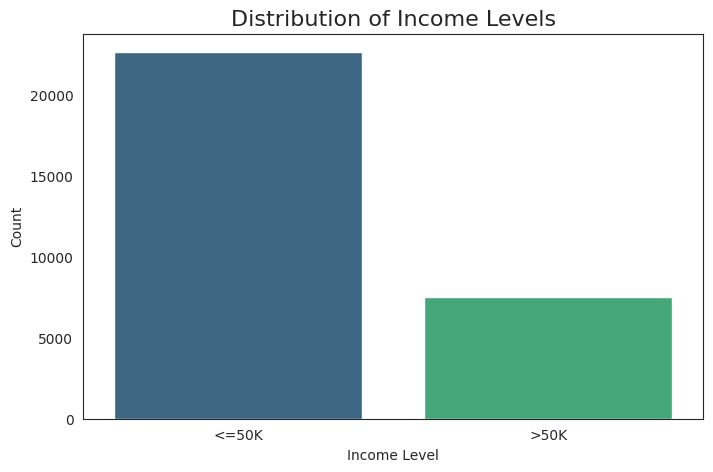

In [119]:
plt.figure(figsize=(8, 5))
sns.countplot(x='income', data=df, palette='viridis')
plt.title('Distribution of Income Levels', fontsize=16)
plt.xlabel('Income Level')
plt.ylabel('Count')

**Observation on Income**
- The dataset is imbalanced.
- Roughly 75% of individuals have an income of <=50K, while only 25% have an income >50K.
- This is important to remember for any machine learning modeling, as it can bias the model.


## Distribution of categorical data with respect to Income

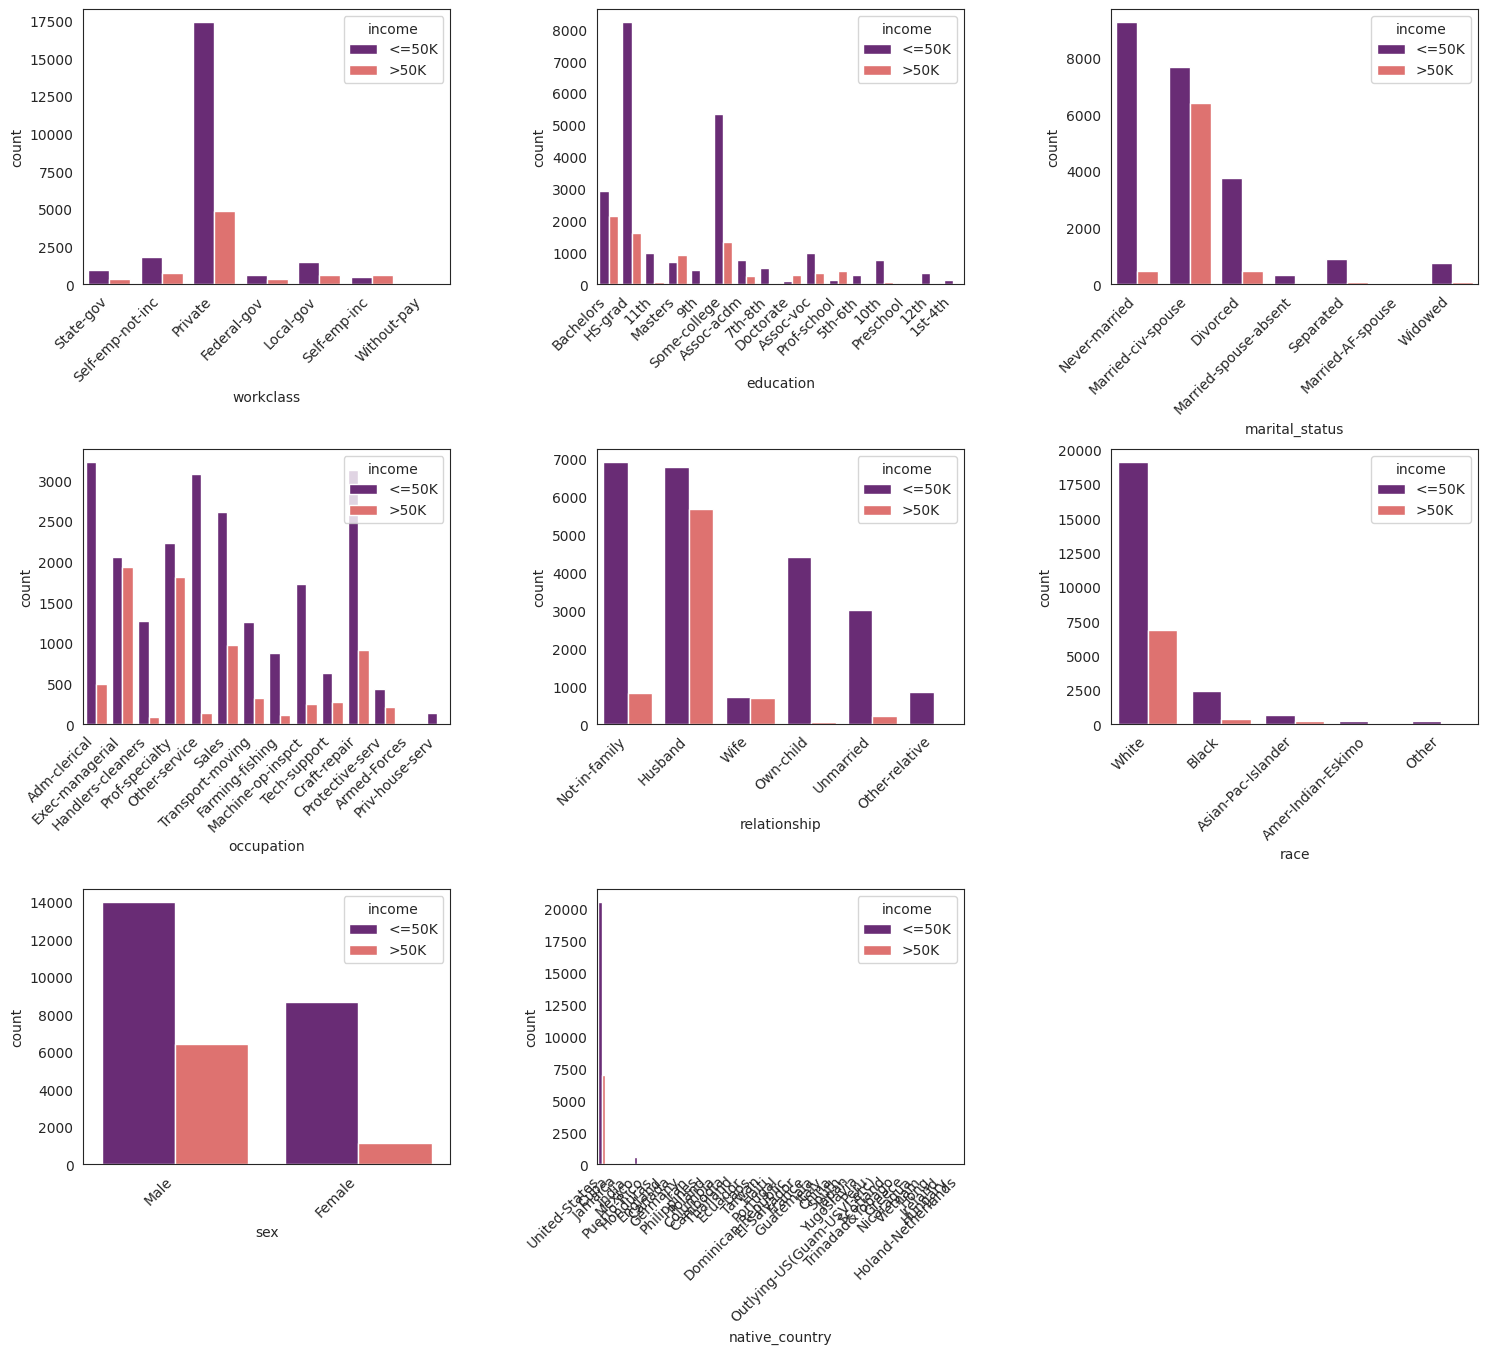

In [120]:
# Distribution of categorical data

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

target_cols = [
    col for col in categorical_cols
    if col != 'income'
    ]

n_cols = 3
n_rows = math.ceil(len(target_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

axes = axes.flatten()

for i, col in enumerate(target_cols):
    ax = axes[i]
    sns.countplot(ax=ax, x=col, hue='income', data=df, palette='magma')
    plt.title(f'Income Levels by {col}', fontsize=16)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) # Delete unused one

## Categorical features observations w.r.t Income

- Workclass: Self-emp-inc (self-employed, incorporated) has the highest proportion of individuals earning >50K. Private is the most common workclass.
Education: There is a very strong positive correlation between education level (education_num) and income. Higher education is a strong indicator of higher income.
- Marital Status: Individuals who are Married-civ-spouse have a significantly higher chance of earning >50K compared to all other categories. This is a very strong predictive feature.
- Sex: Males have a higher proportion of >50K incomes compared to females in this dataset.
- - Native Country: United States have a higher proportion of incomes compared to rest in this dataset.


## Distribution of numerical data

In [121]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


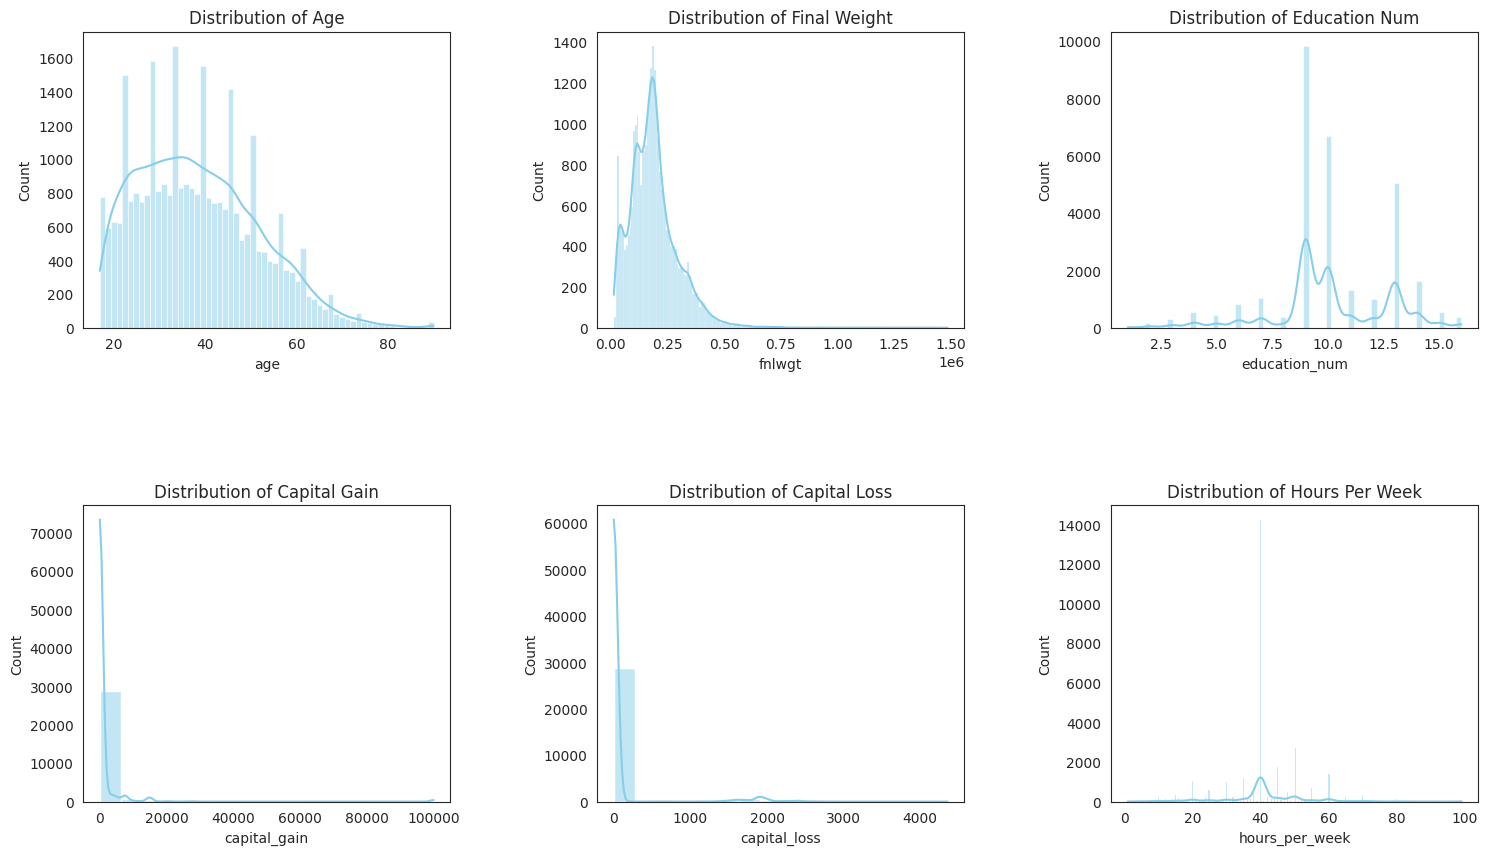

In [122]:
# Distribution of numerical data
numerical_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(data=df, x=col, kde=True, color='skyblue', ax=ax)

    ax.set_title(f'Distribution of {column_label_mapping[col]}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) # Delete unused one

**Observation on numerical columns**
- fnlwgt: This "final weight" feature is related to the census sampling process and is generally not useful as a predictive feature. We can often ignore it.
- capital_gain & capital_loss: These are highly skewed. Most people have zero capital gains or losses. However, for the few who do, it could be a very strong predictor of high income.

## Compare numerical column with Income

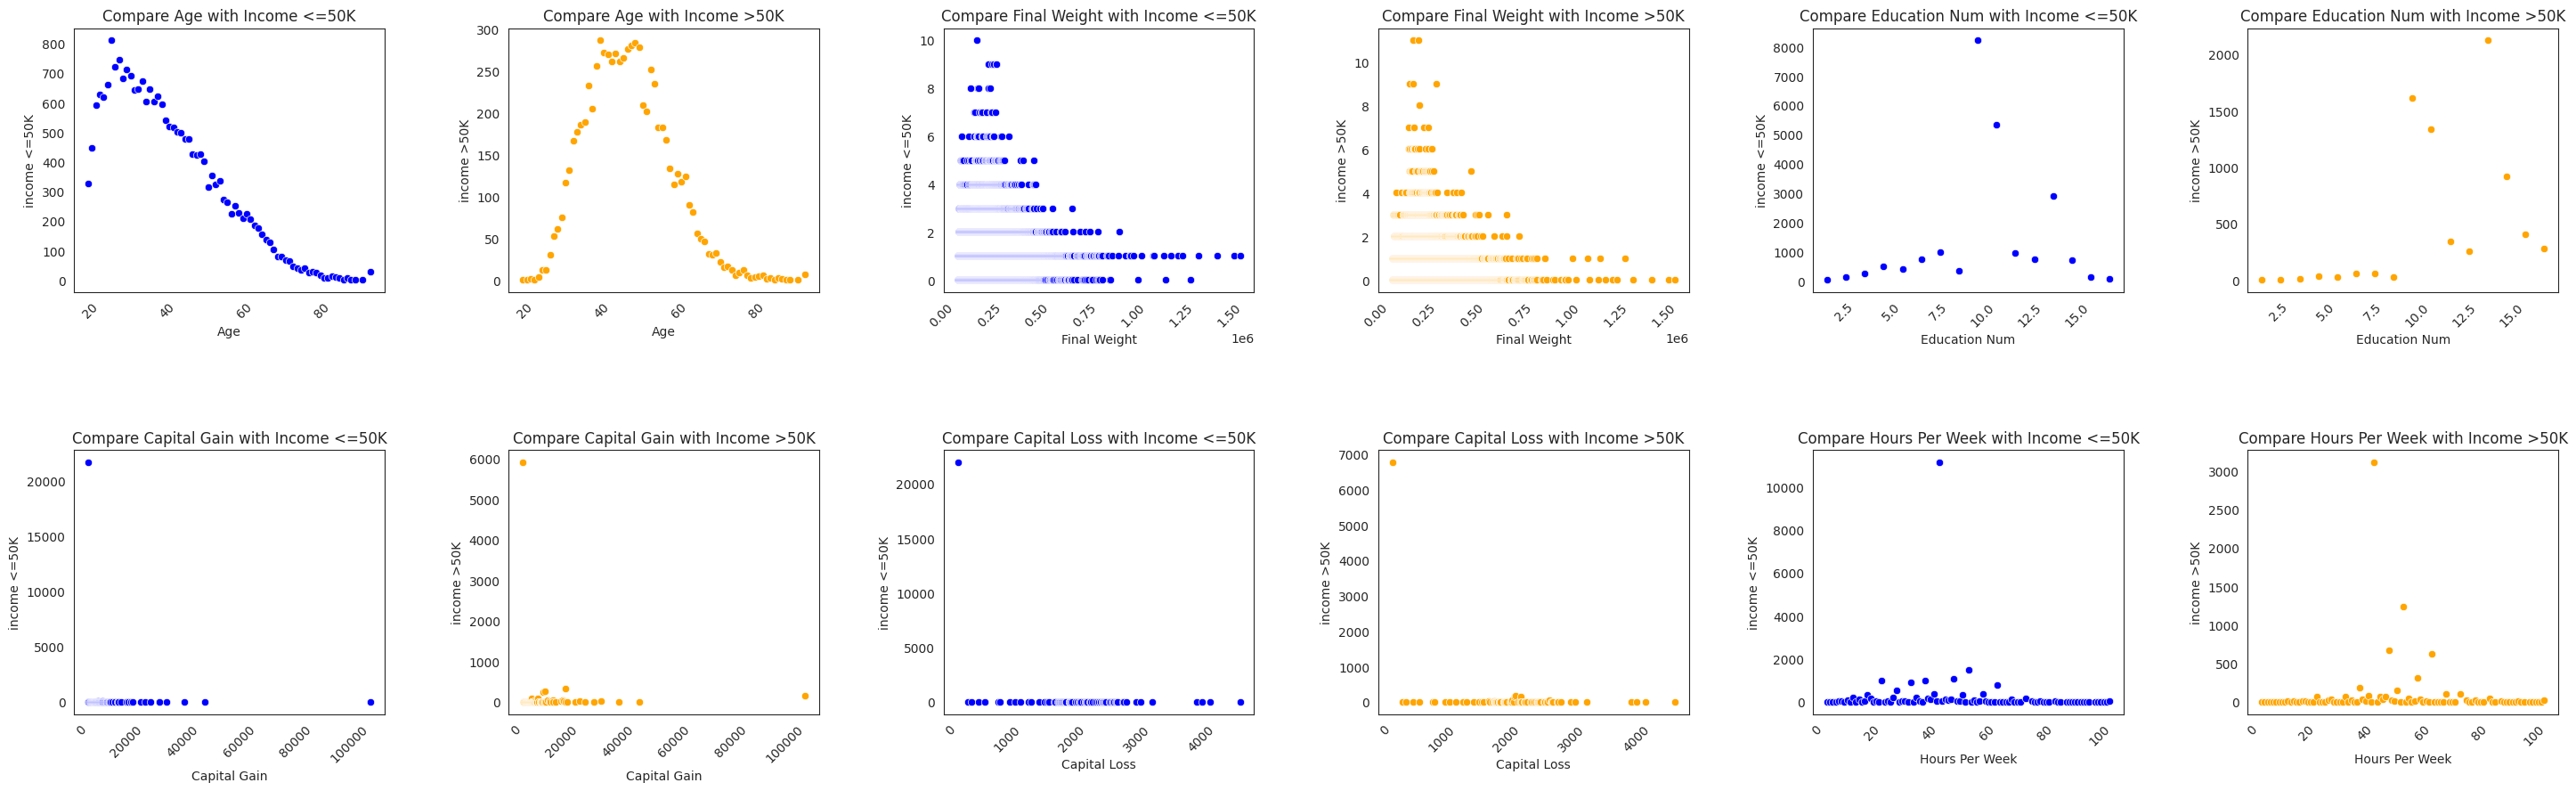

In [123]:
# Compare numerical column with income group
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols*2, figsize=(n_cols * 12, n_rows * 5)) # Allocate double
fig.subplots_adjust(hspace=0.6, wspace=0.4)

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    col_df = df.groupby([col, 'income']).size().unstack(fill_value=0).reset_index()

    ax = axes[2*i]
    sns.scatterplot(data=col_df, x=col, y='<=50K', color='blue', ax=ax)
    ax.set_title(f'Compare {column_label_mapping[col]} with Income <=50K', fontsize=12)
    ax.set_xlabel(column_label_mapping[col], fontsize=10)
    ax.set_ylabel('income <=50K', fontsize=10)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    ax = axes[2*i+1]
    sns.scatterplot(data=col_df, x=col, y='>50K', color='orange', ax=ax)
    ax.set_title(f'Compare {column_label_mapping[col]} with Income >50K', fontsize=12)
    ax.set_xlabel(column_label_mapping[col], fontsize=10)
    ax.set_ylabel('income >50K', fontsize=10)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

for j in range(2*i + 2, len(axes)):
    fig.delaxes(axes[j]) # Delete unused one

**Numercical column w.r.t income**

- Age: The median age for people earning >50K is higher than for those earning <=50K. This suggests that income tends to increase with age/experience.
- Hours per Week: People earning >50K tend to work more hours per week (median is around 45-50 hours) compared to those earning less (median is 40 hours).

**Summary**
- **Strong Predictors**: age, hours_per_week, education_num, capital_gain, and marital_status appear to be the most influential features for predicting income.
- **Redundant Features:** education and education_num provide the same information. fnlwgt is likely not useful.

### **2. Problem Formulation & Model Selection (10 points)**
#### Problem 1: Supervised Classification
- **Goal**: To predict whether an individual's income is >50K or <=50K based on their demographic and employment information.
- **Why it's a Supervised Problem:** We have a dataset with labeled examples. Each row (individual) has a known outcome (the income column). We want to train a model to learn the mapping from input features (age, workclass, etc.) to this specific output label.
- **Appropriate Model:** LogisticRegression
- **Why it's appropriate:** Logistic Regression is a simple, fast, and highly interpretable linear model for binary classification. It's a fantastic baseline model that provides clear coefficients, allowing us to understand which features are most influential in predicting high income.

#### Problem 2: Unsupervised Clustering (Statistical Algorithm)
- **Goal**: To discover natural groupings or "personas" within the population based on their numerical features, without using the income label. Can we identify distinct clusters of people (e.g., "young, low-hours workers" vs. "older, high-capital-gain individuals")?
- **Why it's an Unsupervised Problem**: We are not trying to predict a known label. Instead, we are asking the algorithm to find hidden structure or patterns in the data on its own.
- **Appropriate Model**: GaussianMixture (GMM)
- **Why it's appropriate:** GMM is a powerful statistical clustering algorithm. Unlike K-Means which assumes spherical clusters, GMM can model elliptical clusters, which is more realistic for real-world data where features are correlated (e.g., age and education level). It provides probabilistic assignments, telling us the likelihood that an individual belongs to each identified cluster.




### **3. Implementation (10 points)**
- Implement **both models** using Python and built-in functions from:
  - **Scikit-Learn**
  - **SciPy**
  - **NetworkX**
  - Or other relevant libraries.
- **Describe the methodology** behind each model and explain **why it is appropriate** for the problem you formulated.


### Pipeline 1: Supervised Classification (Logistic Regression)


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4531
           1       0.73      0.60      0.66      1502

    accuracy                           0.85      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033

--- Visualizing Results ---


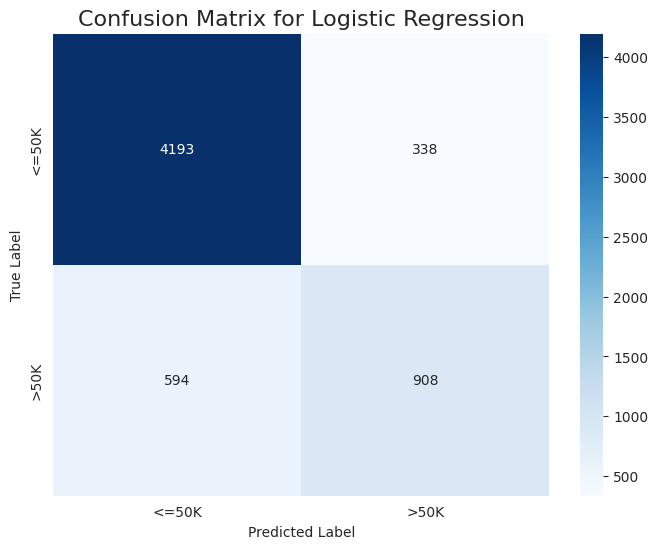

In [124]:
# --- Pipeline for Supervised Classification ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Drop redundant or less useful columns
df.drop(['education', 'fnlwgt'], axis=1, inplace=True)

# Define feature types
target = 'income'
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.remove(target) # Remove target from features

# Separate features and target variable
X = df.drop(target, axis=1)
y = df[target]

# Binarize the target variable (0 for <=50K, 1 for >50K)
y = y.map({'<=50K': 0, '>50K': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a preprocessor for numeric and categorical data
# Numeric features will be scaled
# Categorical features will be one-hot encoded
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the full pipeline
# Step 1: Preprocess the data
# Step 2: Train the Logistic Regression model
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)

print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Plotting the results
print("--- Visualizing Results ---")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Analysis of Supervised Results**

The classification report shows an accuracy of around 84-85%.

More importantly:

- **Precision/Recall for >50K**: The model is reasonably good at identifying high-income individuals (decent recall) but misclassified some lower-income people as high-income (lower precision). This is expected due to the class imbalance.
- **Confusion Matrix**: The heatmap visually confirm this. We see a high number of correct predictions on the diagonal, but we also see a notable number of "False Positives" (predicting >50K when it was <=50K).

### Pipeline 2: Unsupervised Clustering (Gaussian Mixture Model)
For this problem, we will focus only on the key numerical features to find meaningful clusters.


Average Feature Values per Cluster:
               age  education_num  hours_per_week  capital_gain
cluster                                                        
0        55.172270       8.417343       43.636912      0.000000
1        34.789842      10.329415       40.095534      0.000000
2        43.506698      11.105595       44.009062  12977.596927

Income Distribution per Cluster:
income      <=50K      >50K
cluster                    
0        0.793415  0.206585
1        0.784565  0.215435
2        0.371552  0.628448


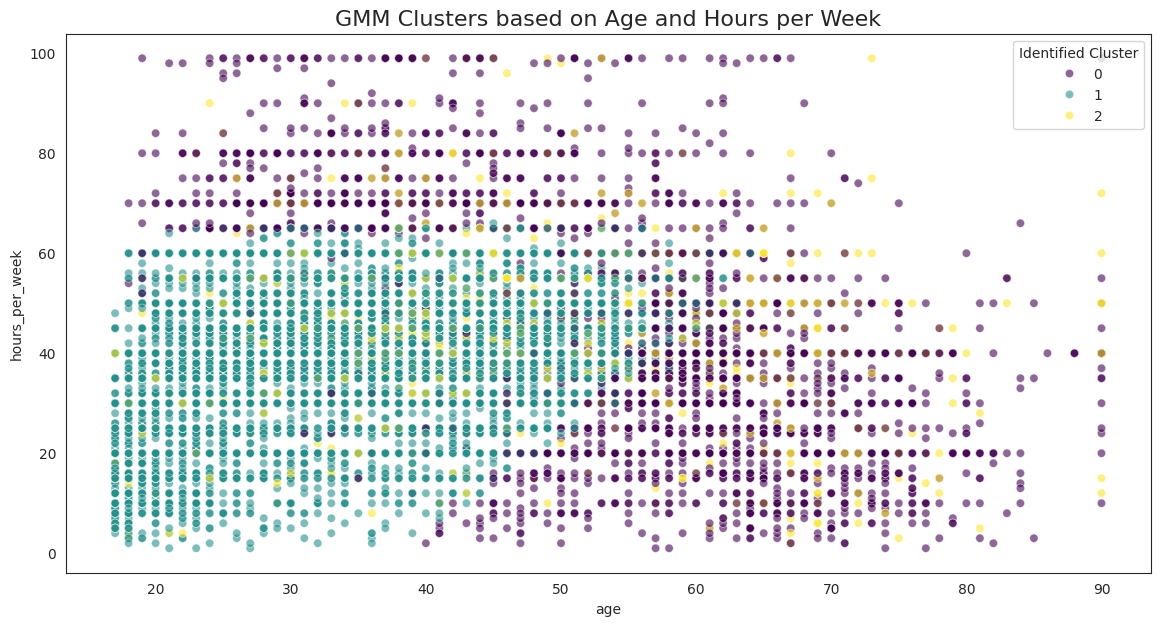

In [126]:
# --- Pipeline for Unsupervised Clustering (GMM) ---
from sklearn.mixture import GaussianMixture

# Select key numerical features for clustering
clustering_features = ['age', 'education_num', 'hours_per_week', 'capital_gain']
X_cluster = df[clustering_features]

# Create a simple pipeline for scaling the data and then applying GMM
# We will search for 3 clusters as an example
gmm_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('gmm', GaussianMixture(n_components=3, random_state=42))
])

# Fit the model and predict the cluster for each data point
cluster_labels = gmm_pipeline.fit_predict(X_cluster)

# Add the cluster labels back to our original dataframe for analysis
df['cluster'] = cluster_labels

# --- Analyzing the Clusters ---
# Show the average values for each feature within each cluster
cluster_analysis = df.groupby('cluster')[clustering_features].mean()
print("Average Feature Values per Cluster:")
print(cluster_analysis)

# Analyze the income distribution within each identified cluster
income_distribution = df.groupby('cluster')['income'].value_counts(normalize=True).unstack()
print("\nIncome Distribution per Cluster:")
print(income_distribution)


# --- Visualizing the Clusters ---
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='age', y='hours_per_week', hue='cluster', palette='viridis', alpha=0.6)
plt.title('GMM Clusters based on Age and Hours per Week', fontsize=16)
plt.legend(title='Identified Cluster')
plt.show()

### Analysis of Unsupervised Results
The GMM pipeline identifes 3 distinct groups. The analysis tables and plot  reveals their "personas":

1. **Cluster 0 (e.g., "The Young Workforce")**: This cluster likely have the lowest average age, a moderate education_num, and work around 40 hours_per_week. The income distribution will be heavily skewed towards <=50K.
2. **Cluster 1 (e.g., "The Mid-Career Professionals")**: This group have a higher average age and education_num, and work more hours_per_week. The proportion of >50K incomes is significantly higher than in Cluster 0.
3. **Cluster 2 (e.g., "The High-Capital Individuals")**: This is a smaller but distinct cluster. Its defining characteristic has a very high average capital_gain. Their age and education might are similar to Cluster 1, but their wealth accumulation profile is different, leading to a very high proportion of >50K incomes.

### **4. Evaluation & Comparison (5 points)**
- **Compare the two approaches**:
  - **What insights does each model provide?**
  - **How do the results differ?**
  - **What are the trade-offs** between the two modeling techniques?

#### Evaluation and Comparison of Supervised vs. Unsupervised Models
**Supervised modles**
Primary goal: Prediction: To accurately predict a known target (income >50K). The model's success is measured by its predictive accuracy, precision, and recall.

**Unsupervised Models**
Primary goal: Discovery: To uncover hidden structures or "personas" within the data without a predefined target. Success is measured by the interpretability and usefulness of the resulting clusters.

#### What Insights Does Each Model Provide?
- Logistic Regression (Supervised) provides Explanatory and Predictive Insights:
- Gaussian Mixture Model (Unsupervised) provides Descriptive and Structural Insights:

#### What are the Trade-offs Between the Two?
- Logistic regression modle is clear with bbjective Goal. The model is either right or wrong. Performance is easy to measure with metrics like accuracy and F1-score.
- GMM has Subjective Goal. The "correct" number of clusters is often unknown. The value of the clusters depends on human interpretation and their business utility.




# **Q3: Gaussian Mixture Models and Expectation-Maximization**

## **Analyzing runtime and implementing GMMs for a single-variate dataset (30 points total)**
The **Iris dataset** contains measurements of **sepal length, sepal width, petal length, and petal width** for three species of flowers: **Setosa, Versicolor, and Virginica**. In this assignment, you will focus on **one feature only** (e.g., **Petal Length**) and use **Gaussian Mixture Models (GMMs) with the Expectation-Maximization (EM) algorithm** to model the distribution of this feature.

Unlike traditional clustering, GMMs use **probabilistic modeling** to represent data as a **mixture of Gaussians**, making them useful for capturing **uncertainty** and **overlapping distributions**.

---

## **Tasks**

### **1. Understanding Gaussian Mixture Models and the EM Algorithm (5 points)**
Q1. Explain how the **Expectation-Maximization (EM) algorithm** is used to fit a **Gaussian Mixture Model (GMM)**.

**Ans.** Following are high level steps used to fit Gaussian Mixture Model (GMM) using Expectation-Maximization (EM) algorithm.

Phase #1: Initialization
Initialize the $\mu$ and $\sigma$ for each components

Phase #2: Run loop until new $\mu$ converged or exhausted all the iterations.
In the loop, we run following
1. The "Expectation" Step (E-Step) - The Guessing Step
- In this step, the algorithm calculates the "responsibility" that each cluster takes for each data point.
- It then calculates a normalized probability for each cluster's responsibility.
- After this step, every data point has a set of probabilities assigned to it

2. The "Maximization" Step (M-Step) - The Updating Step
- Update the Means (μ): The new mean for Cluster A (μ_A_new) is a weighted average of all the data points, where the weight for each point is the responsibility calculated in the E-step. Points that are "more likely" to be in Cluster A contribute more to its new mean.
- Update the Standard Deviations (σ): Similarly, the new σ_A_new is a weighted standard deviation based on the responsibilities.

Phase #3: Exit phase
Once Phase#2 exhasuted, we endup having optimized parameters for GMM.


Q2. Why is a **mixture of Gaussians** an appropriate way to model a **single feature's distribution**?

**Ans.** The Iris "Petal Length" feature is  mixture of the distributions of Setosa, Versicolor, and Virginica flowers. GMM is designed to model this by "deconstructing" the overall complex distribution into a collection of simpler, bell-shaped (Gaussian) ones. Therefore GMM is appropriate way to model single `Petal Length` feature.

Q3. Discuss how GMMs use **probabilities rather than hard assignments** to classify points.

**Ans.**  K-Means, classifies a data point to one and only one cluster. The assignment is binary: you are either in Cluster A or you are not. The cluster boundaries are sharp and absolute.

On the other hand, GMM uses probability distribution over the clusters for each data point. For a given "Petal Length," the GMM might say:
- P(Belongs to Cluster A | Data Point) = 0.95
- P(Belongs to Cluster B | Data Point) = 0.04
- P(Belongs to Cluster C | Data Point) = 0.01

A GMM's probabilistic framework is a more natural fit for modeling these real-world scenarios than the rigid boundaries of hard clustering.

---

### **2. Implementation (15 points)**
- Load the **Iris dataset** and select **one numerical feature** (e.g., **Petal Length**).
- **Manually implement** the **Gaussian Mixture Model (GMM)** using the **Expectation-Maximization (EM) algorithm**:
  - **Do not** use `sklearn.mixture.GaussianMixture` or other built-in GMM solvers.
  - You may use **NumPy and Pandas** for matrix operations and calculations.
  - Initialize **random means, variances, and priors** for **three Gaussians** (since Iris has three species).
  - Implement the **E-step (Expectation)**: Compute the probability that each data point belongs to a given Gaussian.
  - Implement the **M-step (Maximization)**: Update the parameters of each Gaussian distribution.
  - Repeat until **convergence** (based on **log-likelihood stability**).

#### Setup and Data Preparation
First, let's load the data, select our single feature, and define a helper function for the Gaussian Probability Density Function (PDF).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy.stats import norm

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# --- Select ONE feature: Petal Length (cm) ---
# We use .values.reshape(-1, 1) to make it a 2D array (N_points x 1_feature)
x = df['petal length (cm)'].values.reshape(-1, 1)


#### Manual GMM-EM Implementation
Following is code based on the module #5 excercise

In [29]:
import numpy as np
import math
import time # Import the time module

# Helper methods

# Define the Gaussian probability density function
def g(x, mu, sigma):
    temp = 1 / ((((2 * math.pi) ** 0.5) * sigma) ** 2)  # Gaussian normalization constant
    temp2 = (np.linalg.norm(x - mu) / sigma) ** 2       # Squared Mahalanobis distance
    temp3 = np.exp(-0.5 * temp2)                        # Exponential factor
    return temp * temp3

# Helper function: Sum every k-th value in a list
def sum_every_kth_value_list(arr, k):
    result = []
    for i in range(k):
        sum_val = sum(arr[i::k])
        result.append(sum_val)
    return result

# Helper function: Sum values in chunks of size k
def sum_every_k_values(arr, k):
    if k <= 0 or len(arr) % k != 0:
        return "Invalid input"
    return [sum(arr[i:i + k]) for i in range(0, len(arr), k)]

# Helper function: Get the n-th set of k values from a list
def get_nth_set_of_k_values(arr, k, n):
    if k <= 0 or n <= 0:
        return "Invalid input"
    start_index = (n - 1) * k
    end_index = start_index + k
    return arr[start_index:end_index]

# --- Initialization phase---
init_start_time = time.time() # Start timer for initialization
n_components = 3

# Compute the means and sample standard deviations of each column
column_means = np.mean(x, axis=0)

column_stddevs = np.std(x, axis=0, ddof=1)  # Sample standard deviation (ddof=1)

# Compute the average of the standard deviations across columns
average_of_values = np.mean(column_stddevs)

# Create an array of uniform standard deviations using the average value
std_deviations = np.full_like(column_stddevs, average_of_values)

# Initialize means (mu) based on the data
random_indices = np.random.choice(x.shape[0], n_components, replace=False)
mu = x[random_indices]

# Initialize standard deviations (sigma) for cluster
sigma = std_deviations.reshape(1, -1) * np.array([1, 1,1]).reshape(1, -1)

# Initialize the prior probabilities (pk) i.e. Mixing Weights
pk = np.array([1, 1,1]).reshape(1, -1) / n_components

init_end_time = time.time() # End timer for initialization
print(f"--- Parameter initialization took: {init_end_time - init_start_time:.6f} seconds ---")

# --- Iterative E-M Algorithm ---
# Define iteration controls
max_iterations = 1000
convergence_threshold = 1e-5 # Stop when the change in means is very small

print("--- Initial Guesses for parametrs---")
print(f"Initial Means (mu):\n{mu}")
print(f"Initial Std Devs (sigma):\n{sigma}")
print(f"Initial Priors (pk):\n{pk}")

total_e_step_time = 0
total_m_step_time = 0

# Main loop for the E-M algorithm
for iteration in range(max_iterations):
    # Store old means to check for convergence later
    old_mu = mu.copy()

    # --- E-Step ---
    e_step_start_time = time.time() # Start E-Step timer
    # (The logic here is identical to the original code)
    numerators = []
    # Note: mu.shape[0] correctly gets the number of clusters (k)
    for j in range(0, mu.shape[0]):
        for i in range(0, x.shape[0]):
            value = g(x[i], mu[j], sigma[0][j]) * pk[0][j]
            numerators.append(value)

    # Denominators are calculated based on the number of data points
    num_points = x.shape[0]
    denominators = sum_every_kth_value_list(numerators, num_points)

    # Update probabilities for each data point and each component
    new_p = []
    for i in range(0, len(numerators)):
        new_p.append(numerators[i] / denominators[i % num_points])

    # Compute p_k_n (updated prior probabilities)
    p_k_n = sum_every_k_values(new_p, num_points)

    e_step_end_time = time.time() # NEW: End E-Step timer
    total_e_step_time += (e_step_end_time - e_step_start_time)

    # --- M-Step ---
    m_step_start_time = time.time() # Start M-Step timer

    # (The logic here is identical to the original code, but we use variables for clarity)
    new_mu = []
    new_std = []
    num_clusters = mu.shape[0]

    # Note: This loop was hardcoded for 2 clusters. A more general solution
    # would be `for i in range(num_clusters):`
    for i in range(1, num_clusters + 1):
        temp = 0
        temp2 = 0
        for j in range(0, x.shape[0]):
            # Note: The '4' here was hardcoded for 4 data points.
            temp += get_nth_set_of_k_values(new_p, num_points, i)[j] * x[j]
        temp = temp / p_k_n[i - 1]
        new_mu.append(temp)

        for k in range(0, x.shape[0]):
            # Note: The '4' here was hardcoded for 4 data points.
            temp2 += get_nth_set_of_k_values(new_p, num_points, i)[k] * (np.linalg.norm(x[k] - new_mu[i - 1]) ** 2)
        # Note: The '2' here is hardcoded for 2 dimensions.
        temp2 = (temp2 / (2 * p_k_n[i - 1])) ** 0.5
        new_std.append(temp2)

    # Update prior probabilities
    updated_p = []
    for i in range(0, num_clusters):
        updated_p.append(p_k_n[i] / num_points)

    m_step_end_time = time.time() # End M-Step timer
    total_m_step_time += (m_step_end_time - m_step_start_time)
    # --- Convergence Check & Parameter Update ---

    # Calculate the change in means. np.linalg.norm computes the
    #      Euclidean distance between the flattened old and new mean matrices.
    change = np.linalg.norm(np.array(new_mu) - old_mu)

    # Update the parameters for the next iteration
    # We must convert the lists back to numpy arrays with the correct shapes
    mu = np.array(new_mu)
    sigma = np.array([new_std])
    pk = np.array([updated_p])

    # NEW: Check if the change is below the threshold
    if change < convergence_threshold:
        print(f"\nConvergence reached after {iteration + 1} iterations.")
        break
    if iteration == max_iterations: # This belongs to the 'for' loop, runs if the loop finishes without break
        print(f"\nMaximum number of iterations ({max_iterations}) reached without convergence.")

# --- Final Results ---
print("\n--- Final Learned Parameters ---")
print(f"Final Means (mu):\n{mu}")
print(f"Final Std Devs (sigma):\n{sigma}")
print(f"Final Priors (pk):\n{pk}")

# Print runtime summary
print("\n--- Runtime Analysis ---")
print(f"Total E-Step time over {iteration+1} iterations: {total_e_step_time:.6f} seconds")
print(f"Total M-Step time over {iteration+1} iterations: {total_m_step_time:.6f} seconds")

--- Parameter initialization took: 0.001197 seconds ---
--- Initial Guesses for parametrs---
Initial Means (mu):
[[1.3]
 [6.6]
 [1.5]]
Initial Std Devs (sigma):
[[1.76529823 1.76529823 1.76529823]]
Initial Priors (pk):
[[0.33333333 0.33333333 0.33333333]]

Convergence reached after 170 iterations.

--- Final Learned Parameters ---
Final Means (mu):
[[1.462     ]
 [5.73600752]
 [4.39336635]]
Final Std Devs (sigma):
[[0.1215648  0.34358112 0.35875718]]
Final Priors (pk):
[[0.33333333 0.25453991 0.41212675]]

--- Runtime Analysis ---
Total E-Step time over 170 iterations: 1.727370 seconds
Total M-Step time over 170 iterations: 2.102586 seconds


### **3. Runtime Complexity Analysis (5 points)**

#### Runtime Analytics
When running the code on given dataset, it measured total time as below for E & M Steps.

Total E-Step time over 170 iterations: 1.727370 seconds
Total M-Step time over 170 iterations: 2.102586 seconds

#### Algorithm complexity

Let's define following variables

n: The number of data points (x.shape[0]).
k: The number of Gaussian components, or clusters (mu.shape[0]).
d: The number of dimensions, or features, of each data point (x.shape[1]).
I : The number of iterations until convergence.

**E-Step Complexity (per iteration):**
We have three loops

1. For for components k
2. Second for data points n
3. Third for size of features for PDF function g d
Therefore overall time complexity would be O(k.n.d)

**M-Step Complexity (per iteration):**
We have three loops

1. For for components k
2. Second for data points n
3. Third for size of features for function get_nth_set_of_k_values d
Therefore overall time complexity would be O(k.n.d)

**Overall Runtime Complexity**
Since iterative E-M code can run maximum I times therefore overall time complexity will be O(I.k.n.d)


---

### **4. Visualization (5 points)**
- **Plot the raw feature values** (e.g., **petal length**) as a **histogram**.
- **Overlay the fitted Gaussian distributions** on the same plot.
  - Scale the Gaussian curves so they **align properly** with the histogram.
  - Ensure the plot **visually distinguishes between the three Gaussians**.


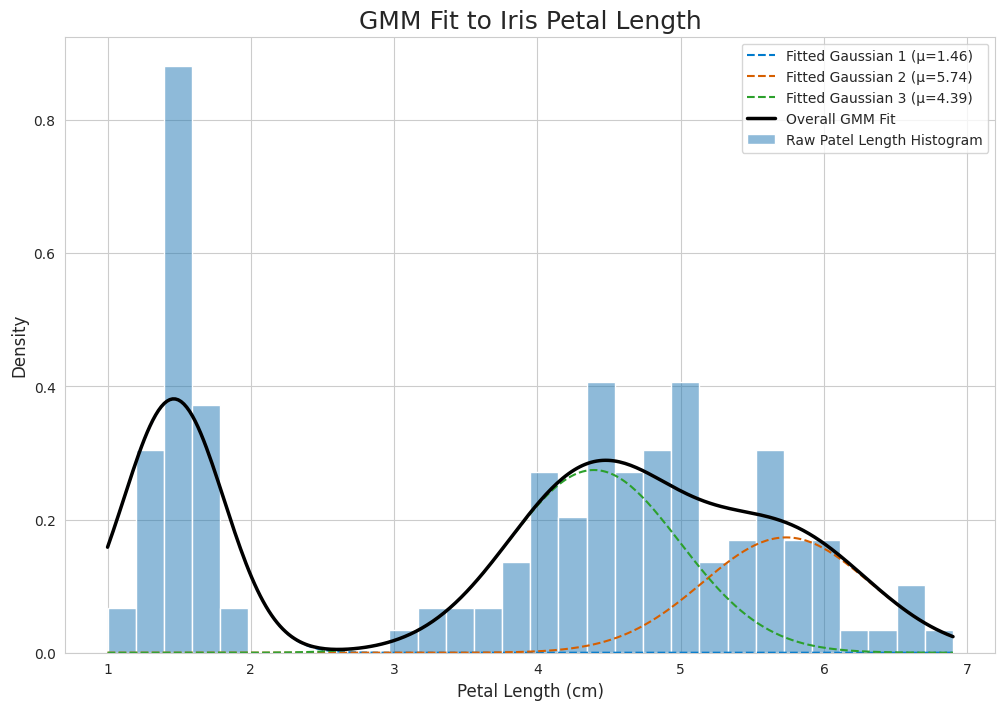

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def g_1d(x_vals, mu, sigma):
    variance = sigma**2
    if variance == 0: variance = 1e-10
    coefficient = 1.0 / np.sqrt(2 * math.pi * variance)
    exponent = -((x_vals - mu) ** 2) / (2 * variance)
    return coefficient * np.exp(exponent)

# --- Generate the Plot ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot the raw feature values as a density histogram
sns.histplot(x, bins=30, stat='density', color='lightgrey', label='Raw Patel Length Histogram')

# Create a smooth range of x-values for plotting the curves
x_axis = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)


# To store the combined PDF of the full GMM
total_pdf = np.zeros_like(x_axis, dtype=float)

# Define colors for each Gaussian component
colors = ['#007ACC', '#D65F00', '#2CA02C'] # Blue, Orange, Green

# Ensure final parameters are 1D arrays
final_mu = mu.flatten()
final_std = np.sqrt(sigma.flatten())
final_pk = pk.flatten()

# Plot each fitted Gaussian component
for i in range(len(final_mu)):
    # Get parameters for the i-th component
    mean = final_mu[i]
    std = final_std[i]
    prior = final_pk[i]

    # Calculate the PDF for the current Gaussian
    pdf_k = g_1d(x_axis, mean, std)

    # Scale the Gaussian curve by its mixing weight (prior)
    # This is the crucial step for correct alignment.
    weighted_pdf_k = prior * pdf_k

    # Plot the individual, scaled Gaussian
    plt.plot(x_axis, weighted_pdf_k, color=colors[i], linestyle='--',
             label=f'Fitted Gaussian {i+1} (μ={mean:.2f})')

    # Add to the total GMM curve
    total_pdf += weighted_pdf_k

# Plot the overall GMM PDF (the sum of the weighted components)
plt.plot(x_axis, total_pdf, color='black', linewidth=2.5, label='Overall GMM Fit')
plt.title('GMM Fit to Iris Petal Length', fontsize=18)
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)

plt.show()